In [1]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [2]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [8]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    # CS = plt.contour(X, Y, Z, V, colors=colors)
    # plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [10]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [11]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


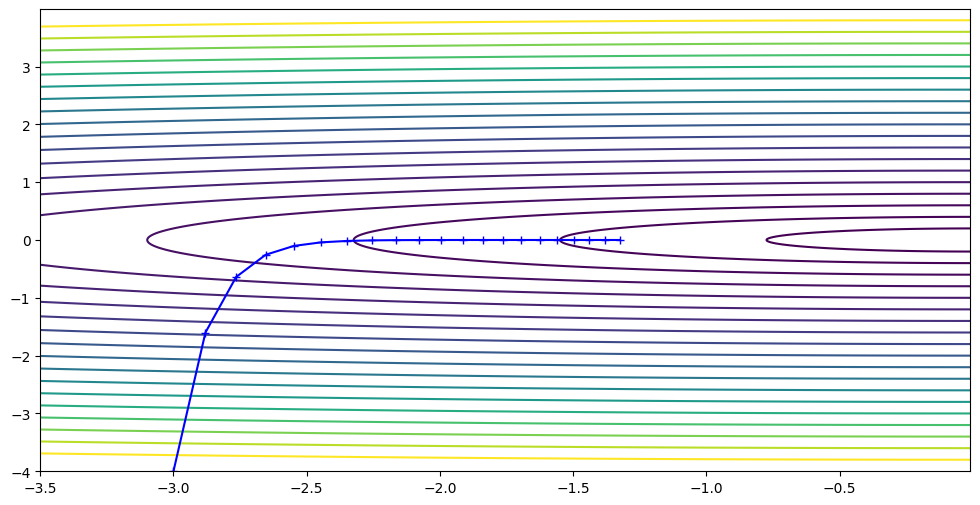

In [6]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


SGD - lr=0.001  4.870, (-2.992, -3.843)
SGD - lr=0.01  3.958, (-2.921, -2.670)
SGD - lr=0.1  2.294, (-2.294, -0.046)
SGD - lr=0.5  0.755, (-0.755,  0.000)
SGD - lr=1  4.004, (-0.171, -4.000)
SGD - lr=1.5 4194304.000, (-0.035, -4194304.000)


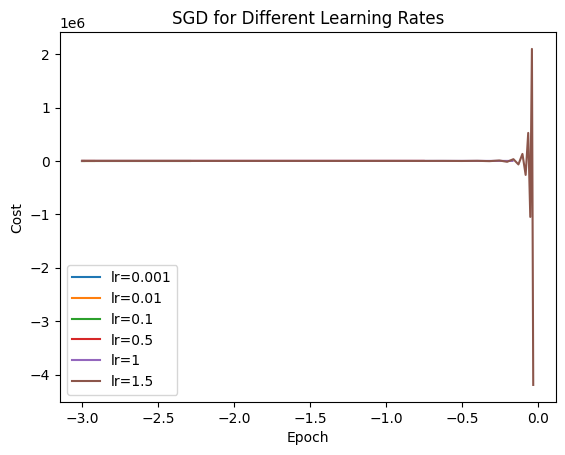

In [26]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 1.5]

nepochs = 20

costs_lr = {}

for lr in learning_rates:
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()

    optimizer = torch.optim.SGD([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  
    
    plt.plot(xhist, yhist, label=f"lr={lr}")
    print(f"SGD - lr={lr} {error(xhist, yhist)}")


plt.xlabel("Epoch")
plt.ylabel("Cost")  
plt.title("SGD for Different Learning Rates")
plt.legend()
plt.show()

SGD - Momentum=0.1 :  1.209, (-1.209, -0.000)
SGD - Momentum=0.5 :  0.532, (-0.532, -0.002)
SGD - Momentum=0.75 :  0.178, ( 0.176,  0.028)
SGD - Momentum=0.9 :  1.187, ( 0.827,  0.852)


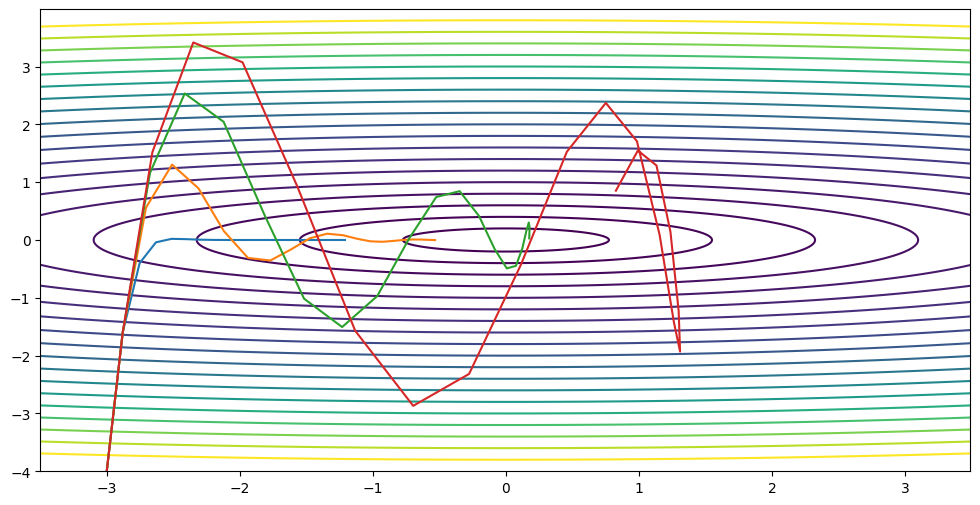

In [41]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.5,-4.,4.], 4., test_function)

# Momentum Parameters (beta_1)
momentum_params = [0.1, 0.5, 0.75, 0.9]

for momentum in momentum_params:
    # initial value
    x = torch.tensor([-3.0, -4.0]).requires_grad_()  
    optimizer = torch.optim.SGD([x], lr=0.3, momentum=momentum)  
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, label=f"momentum={momentum}")
    print(f"SGD - Momentum={momentum} : {error(xhist, yhist)}")

SGD - Momentum=0.1 :  1.209, (-1.209, -0.000)
SGD - Momentum=0.5 :  0.550, (-0.550,  0.000)
SGD - Momentum=0.75 :  0.082, ( 0.082, -0.000)
SGD - Momentum=0.9 :  0.542, ( 0.542, -0.000)


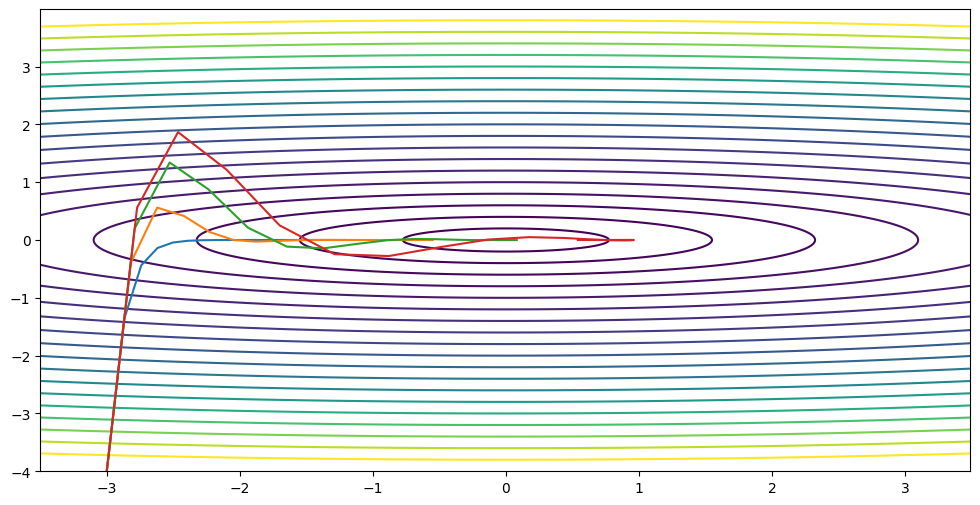

In [40]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.5,-4.,4.], 4., test_function)

# Momentum Parameters (beta_1)
momentum_params = [0.1, 0.5, 0.75, 0.9]

for momentum in momentum_params:
    # initial value
    x = torch.tensor([-3.0, -4.0]).requires_grad_()  
    optimizer = torch.optim.SGD([x], lr=0.3, momentum=momentum, nesterov=True)  
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, label=f"momentum={momentum}")
    print(f"SGD - Momentum={momentum} : {error(xhist, yhist)}")

RMSProp - beta2=0.0 :  0.205, (-0.046,  0.200)
RMSProp - beta2=0.2 :  0.224, (-0.150, -0.166)
RMSProp - beta2=0.8 :  0.020, (-0.000, -0.020)


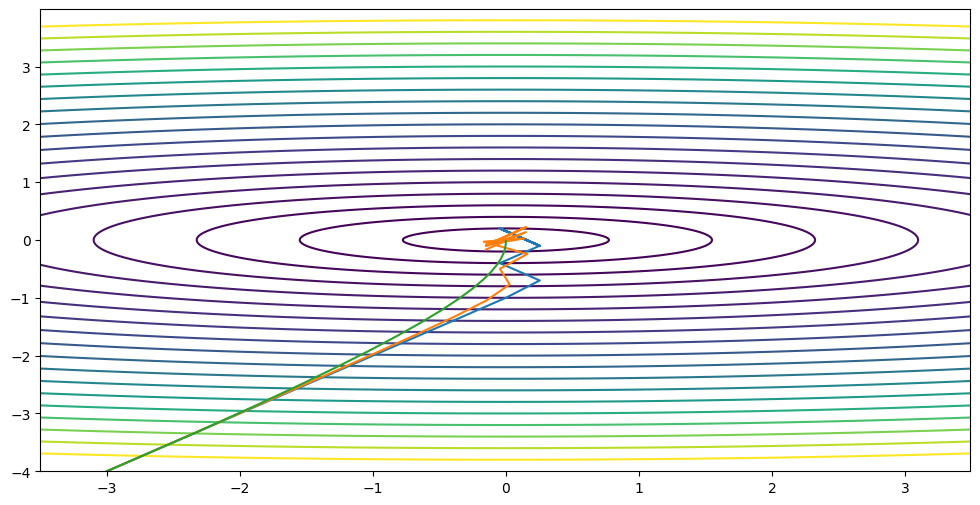

In [38]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.5,-4.,4.], 4., test_function)


# Beta_2 parameters for RMSprop
beta2_params = [0.0, 0.2, 0.8]

for beta2 in beta2_params:
    # initial value
    x = torch.tensor([-3.0, -4.0]).requires_grad_()  
    optimizer = torch.optim.RMSprop([x], lr=0.3, alpha=beta2)  
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)
    plt.plot(xhist, yhist, label=f"RMSProp beta2={beta2}")
    print(f"RMSProp - beta2={beta2} : {error(xhist, yhist)}") 

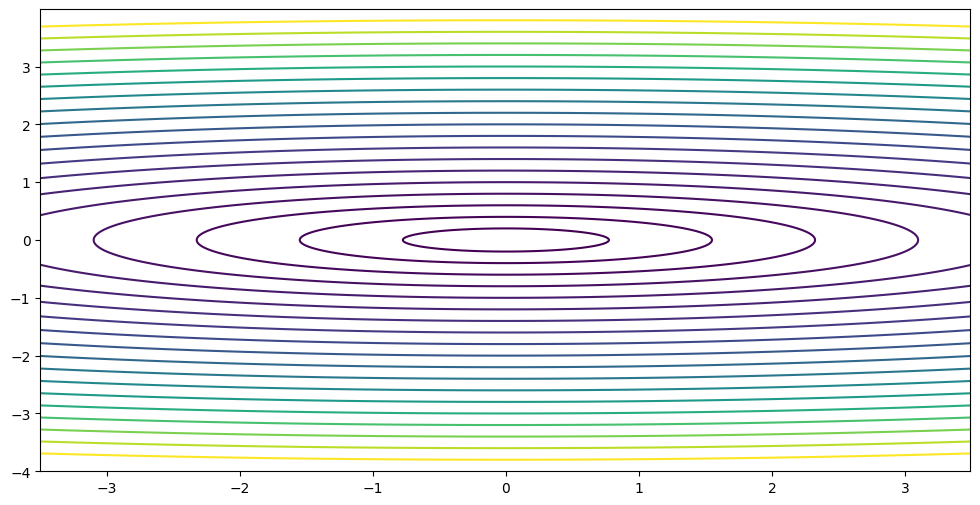

In [43]:
nepochs = 25

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.5,-4.,4.], 4., test_function)

# Adam parameters
beta1_params = [0.9, 0.95, 0.99]
beta2_params = [0.0, 0.2, 0.8]
lr_params = [0.01, 0.001, 0.0001] 

for lr in lr_params:
    for beta1 in beta1_params:
        for beta2 in beta2_params:
            x = torch.tensor([-3.0, -4.0]).requires_grad_()  
            optimizer = torch.optim.Adam([x], lr=lr, betas=(beta1, beta2)) 
            xhist, yhist = optimize(test_function, x, nepochs, optimizer)   
            error_value = float(error(xhist, yhist).split(',')[0]) 

            if error_value <= 1.0e-3:
                plt.plot(xhist, yhist, label=f"Adam lr={lr}, beta1={beta1}, beta2={beta2}")
                print(f"Adam - lr={lr}, beta1={beta1}, beta2={beta2} : {error(xhist, yhist)}") 